In [1]:
import os
import shutil

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objs as go

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import seaborn as sns
sns.set(style='darkgrid', palette='rainbow')

# Examples

This notebook utilizes data scraped from [SOFIFA](www.sofifa.com) and the data can be found on [Kaggle](https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset).

## Best 11 for each position


<a href="https://sofifa.com/squad/559090"><img src="https://i.ibb.co/30s91sm/Screen-Shot-2020-11-18-at-6-57-43-PM.png" width=70%>

## Lionel Messi's profile
    

<a href="https://sofifa.com/player/158023/lionel-messi/"><img src="https://i.ibb.co/p2zVXr5/Screen-Shot-2020-11-18-at-6-52-23-PM.png" width=90%>

# Cleaning and Splitting Data

First, we are going to remove columns that are needed for our analysis; then, in order to keep the data more organized, we will split it into 4 different non-distinct (different dataframes might have common columns) categories:

1) `teams`: Information about soccer __teams__


2) `players`: Information about players that are __not goalkeepers__


3) `goalkeepers`: Information about __goalkeepers__ 


4) `players_personal`: Personal information about __all__ players

In [2]:
# test dictionary

val = list(map(''.join, zip((7*'fifa ').split(), ['_' + str(i) for i in range(15, 22)])))
dic = {key:val[key] for key in range(7)}
print(f'dic := {dic}')

dic := {0: 'fifa_15', 1: 'fifa_16', 2: 'fifa_17', 3: 'fifa_18', 4: 'fifa_19', 5: 'fifa_20', 6: 'fifa_21'}


In [3]:
# for now let's look at the most current data: fifa_21 

fifa_21 = pd.read_csv('../DataSets/soccer_players/players_21.csv') 

In [4]:
fifa_21.info()
fifa_21.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


## Removing unneccessary columns

Some of the columns don't have useful information for personal skills or trait, and will be removed. Moreover, the columns with information related to `national_team` will also be omitted for the sake of simplicity. Notice the `'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'` columns will be used for visualizing players' skills using radar plots.

In [5]:
print(f'\nNumber of columns in fifa_21 = {len(fifa_21.columns)}\n')
print(list(fifa_21.columns))


Number of columns in fifa_21 = 106

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility

In [6]:
cols_to_remove = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
                  'goalkeeping_reflexes', 'international_reputation', 'nation_jersey_number', 'nation_position',
                  'real_face', 'sofifa_id']

fifa_data = fifa_21.drop(cols_to_remove, axis=1)
print(f'\nNumber of columns in fifa_data = {len(fifa_data.columns)}\n')


Number of columns in fifa_data = 96



## Splitting data

The rest of the data will be splitted into 4 categories:
    
1. `teams`: Information related to teams and leagues


2. `players`: Non-goalkeeper players' information to be used in recommendation engines


3. `goalkeepers`: Goalkeeper players' information to be used in recommendation engines


4. `players_personal`: Personal information corresponding to each player
        
The reasons for splitting data: First of all, notice that goalkeepers have a lot of `NA` values for skills corresponding to non-gk players. Also, information regarding teams will not be helpful when comparing players' skills, but we can utilize information regarding their teams and the toughness of the league.
Same applies to personal information, and it will be used to confine search while trying to find similar players to a selected player, like `Age`, `Nationality`, etc. 

Lastly, notice that teams and players share `club_name` column, whereas `short_name` column is the common column between `players`, `goalkeepers` and `players_personal` dataframes.

In [7]:
team_cols = ['short_name', 'club_name', 'team_position', 'league_name', 'league_rank']

personal_cols = ['short_name', 'player_positions', 'player_traits', 'club_name','nationality', 
                 'height_cm', 'weight_kg', 'long_name', 'dob', 'body_type', 'contract_valid_until', 
                 'joined', 'loaned_from', 'player_tags', 'player_traits', 'player_url', 
                 'release_clause_eur', 'team_jersey_number', 'value_eur', 'wage_eur']

gk_cols = ['gk_speed', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

# Using set() reduces the lookup time from O(n) to O(1)

gk_cols_to_keep = [columns for columns in fifa_data.columns 
                   if columns not in set(team_cols[1:] + personal_cols[6:])]

pl_cols_to_keep = [columns for columns in fifa_data.columns 
                   if columns not in set(team_cols[1:] + personal_cols[5:] + gk_cols)]

teams = fifa_data[team_cols].reset_index()

goalkeepers = fifa_data[fifa_data.team_position == 'GK'][gk_cols_to_keep].reset_index()

players = fifa_data[fifa_data.team_position != 'GK'][pl_cols_to_keep].reset_index()

players_personal = fifa_data[personal_cols].reset_index()

# Data Cleaning

Let's check if the new dataframes include any missing values, incorrect data entry or outliers. First, let's create helper functions that we will be using to clean dataframes.

In [8]:
def plot_missing_values(dataFrame):
    
    na_values = dataFrame.isna()
    na_columns = na_values.any()
    cols_with_na = list(dataFrame.columns[na_columns])
    
    if cols_with_na:
        print(f'\nColumns with NA values found:\n\n{cols_with_na}')
        plt.figure(figsize = (10, 6))
        sns.heatmap(dataFrame[cols_with_na].isna());
    else:
        print('Great news! No columns with NA values found!')

## `teams`


Columns with NA values found:

['club_name', 'team_position', 'league_name', 'league_rank']


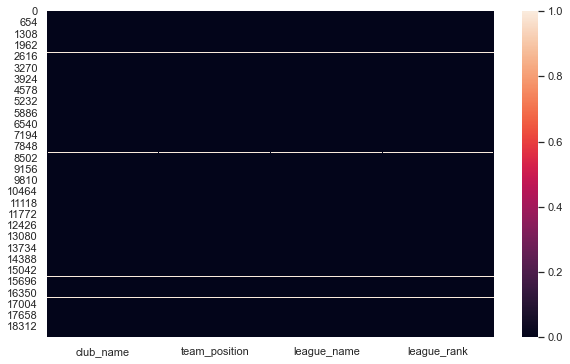

In [9]:
plot_missing_values(teams)

It is apparent that some players don't have any information about their club, most likely because they are __not__ registered for any club within the last transfer window. Let's find out which players are those. For now, let's fill those missing values with `no club` string.

In [10]:
print(teams[teams['club_name'].isna()].short_name)

teams.fillna(value='no club', axis=0, inplace=True)

359      Juiano Mestres
363      Welington Dano
494        J. Serendero
495         J. Frendado
496          M. Baldona
              ...      
16612      R. Jayaraman
16663        S. Rabotov
17061          O. Patla
17085          C. Palan
17086        D. Singhal
Name: short_name, Length: 225, dtype: object


In [11]:
print(f"Juiano Mestres' new data:\n\n{teams.loc[359]}\n")

plot_missing_values(teams)

Juiano Mestres' new data:

index                       359
short_name       Juiano Mestres
club_name               no club
team_position           no club
league_name             no club
league_rank             no club
Name: 359, dtype: object

Great news! No columns with NA values found!


## `players`


Columns with NA values found:

['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'defending_marking']


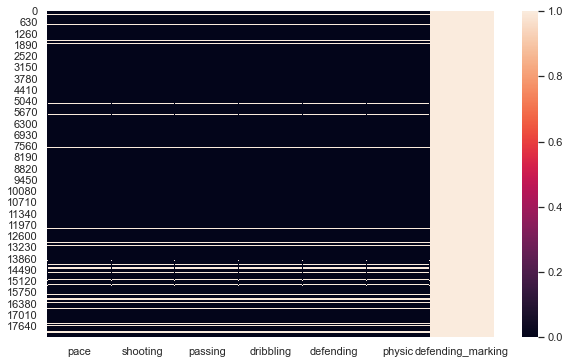

In [12]:
plot_missing_values(players)

It appears that the is a column with full of `NA` values, and it is apparent that this is an inconsistent data entry because the [SOFIFA](www.sofifa.com) doesn't seem to have `marking` for players. So, we are going to drop the whole `defending_marking` column.

In [13]:
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

players.drop('defending_marking', axis=1, inplace=True)

# drop the rows if any values are missing
# notice if any missing --> all rows in skills columns are missing in this case
players.dropna(axis=0, how = 'any', inplace=True)

plot_missing_values(players)

Great news! No columns with NA values found!


## `goalkeepers`


Columns with NA values found:

['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'defending_marking']


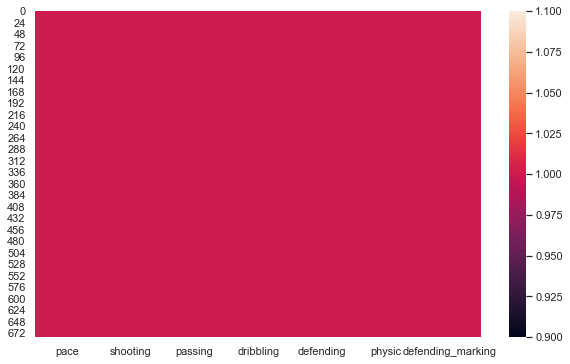

In [14]:
plot_missing_values(goalkeepers)

Same colums are included in the `goal_keepers` so we will drop all of them (notice there is no skills information about goalkeepers) from `goalkeepers` dataFrame as well. We will be comparing `goalkeepers` with their `goalkeeping` skills only.

In [15]:
goalkeepers.dropna(axis=1, how = 'all', inplace=True)

plot_missing_values(goalkeepers)

Great news! No columns with NA values found!


## `players_personal`


Columns with NA values found:

['player_traits', 'club_name', 'contract_valid_until', 'joined', 'loaned_from', 'player_tags', 'player_traits', 'release_clause_eur', 'team_jersey_number']


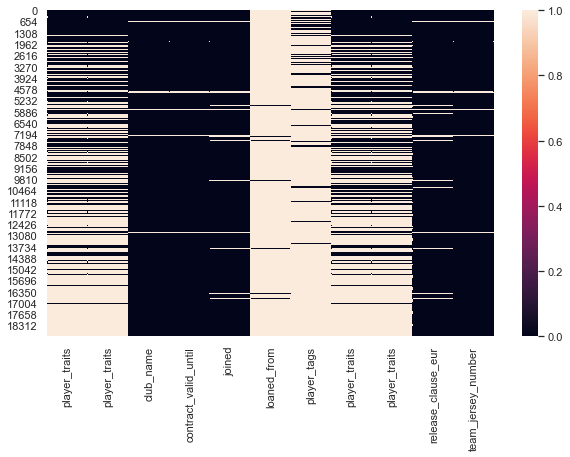

In [16]:
plot_missing_values(players_personal)

The only reason we created `players_personal` dataFrame is to be able to obtain extra information about the players when needed. So, we will __not__ fill __nor__ remove the `NA` values in the rows for now.

## Feature Engineering

We will add columns representing the average skills corresponding to categories given below and compare players avg stats as well as skills on a polygonal radar bar:

- ATT: Average Attacking (`avg_attacking`)

- DEF: Average Defending (`avg_defending`)

- MEN: Average Mentality (`avg_mentality`)

- SKL: Average Skills (`avg_skill`)

- MOV: Average Movement (`avg_movement`)

- POW: Average Power (`avg_power`)

In [18]:
# Adding new features to split player skills into categories
# ATTACKING, DEFENDING, MENTALITY, MOVEMENT, POWER, SKILL

ATT = [cols for cols in players.columns if cols.startswith('attacking')]
DEF = [cols for cols in players.columns if cols.startswith('defending')]
MOV = [cols for cols in players.columns if cols.startswith('movement')]
MEN = [cols for cols in players.columns if cols.startswith('mentality')]
SKL = [cols for cols in players.columns if cols.startswith('skill')]
POW = [cols for cols in players.columns if cols.startswith('power')]

TAG = ['attacking', 'defending', 'mentality', 'skill', 'movement', 'power']
AVG = [ATT, DEF, MOV, MEN, SKL, POW]

for i in range(len(AVG)):
    players['avg_' + TAG[i]] = players[AVG[i]].mean(axis=1)


skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
CAT = ['PACE', 'SHOOT', 'PASS', 'DRIBBLE', 'DEFENSE', 'PHYSICAL']

# print the new columns of the dataframe
# notice dataFrame was already ordered from most skilled to least skilled player
players.iloc[:, -6:].head()

,avg_attacking,avg_defending,avg_mentality,avg_skill,avg_movement,avg_power
0,85.8,32.333333,90.2,73.833333,79.000000,77.8
1,87.4,30.333333,86.2,74.666667,69.833333,88.8
2,84.6,34.666667,81.4,79.833333,68.500000,84.0
3,81.6,31.666667,90.6,74.833333,75.500000,71.4
4,81.4,60.666667,79.6,83.166667,74.166667,81.6


# Visualizations

## Plotly Radar Bar Player Comparisons

In [19]:
player1 = 'L. Messi'
player2 = 'Cristiano Ronaldo'

a = players[players['short_name'] == player1]
b = players[players['short_name'] == player2]

In [20]:
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

In [21]:
# improvement: Use color_map and skill_range below to color the sections of radar plot

color_map = {0:'rgb(255, 0, 0)',     # red              if      0  <= skill < 50
             1:'rgb(255, 140, 0)',   # dark orange      if      50 <= skill < 60
             2:'rgb(255, 215, 0)',   # gold             if      60 <= skill < 70
             3:'rgb(154,205,50)',    # yellow green     if      70 <= skill < 80
             4:'rgb(50, 205, 50)'}   # lime green       if      80 <= skill < 99

skill_range = {0: '0 <= skill < 50',
               1: '50 <= skill < 60',
               2: '60 <= skill < 70',
               3: '70 <= skill < 80',
               4: '80 <= skill < 100'}

In [87]:
player1 = 'L. Messi'
player2 = 'Cristiano Ronaldo'

a = players.loc[0] #[players['short_name'] == player1]
b = players.loc[1] #[players['short_name'] == player2]

# Optinal: If you want to change the range of radialaxis
#r_min = min(a[skills].min(), a[skills].min())
#r_max = max(a[skills].max(), a[skills].min())

# plotly 
fig = go.Figure()

fig.add_trace(go.Scatterpolar(name = a.short_name, r = list(a[skills].values), theta = CAT, fill = 'toself',
                              line =  dict(color = 'lime'), opacity = 0.5
                             )
             )

fig.add_trace(go.Scatterpolar(name = b.short_name, r = list(b[skills].values), theta = CAT, fill = 'toself',
                              line =  dict(color = 'blue'), opacity = 0.5
                             )
             )

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range = [50, 100])), showlegend = True,
                  title_text=f"{a.short_name} vs {b.short_name}", title_font_size=20, title_x=0.46
                 )

fig.update_polars(gridshape='linear')

fig.update_traces(mode="markers", marker=dict(line_color='black', opacity=1))

fig.layout.images = [dict(source="../DataSets/soccer_players/L.Messi.webp",
                          xref="paper", yref="paper",
                          x=0.00, y=0.3,
                          sizex=0.5, sizey=0.5,
                          xanchor="center", yanchor="bottom"
                         ),
                     
                     dict(source="../DataSets/soccer_players/C.Ronaldo.webp",
                          xref="paper", yref="paper",
                          x=1.005, y=0.3,
                          sizex=0.5, sizey=0.5,
                          xanchor="center", yanchor="bottom"
                         )
                    ]

iplot(fig, filename = "Players Skills Comparison")

In [95]:
goalkeeper1 = 'J. Oblak'
goalkeeper2 = 'M. ter Stegen'

a = goalkeepers.loc[0] #[goalkeepers['short_name'] == player1]
b = goalkeepers.loc[1] #[goalkeepers['short_name'] == player2]

gk_skills = ['gk_speed', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
CAT = ['SPEED', 'DIVING', 'HANDLING', 'KICKING', 'POSITIONING', 'REFLEXES']

# plotly 
fig = go.Figure()

fig.add_trace(go.Scatterpolar(name = a.short_name, r = list(a[gk_skills].values), theta = CAT, fill = 'toself',
                              line =  dict(color = 'lime'), opacity=0.5
                             )
             )

fig.add_trace(go.Scatterpolar(name = b.short_name, r = list(b[gk_skills].values), theta = CAT, fill = 'toself',
                              line =  dict(color = 'blue'), opacity=0.5
                             )
             )

fig.update_layout(polar = dict(radialaxis = dict(visible = True, range = [50, 100])), showlegend = True,
                  title_text=f"{a.short_name} vs {b.short_name}", title_font_size=20, title_x=0.46
                 )

fig.update_polars(gridshape='linear')

fig.update_traces(mode="markers", marker=dict(line_color='black', opacity=1))

fig.layout.images = [dict(source="../DataSets/soccer_players/J. Oblak.webp",
                          xref="paper", yref="paper",
                          x=0.00, y=0.3,
                          sizex=0.5, sizey=0.5,
                          xanchor="center", yanchor="bottom"
                         ),
                     
                     dict(source="../DataSets/soccer_players/M. ter Stegen.webp",
                          xref="paper", yref="paper",
                          x=1.005, y=0.3,
                          sizex=0.5, sizey=0.5,
                          xanchor="center", yanchor="bottom"
                        ) 
                    ]

iplot(fig, filename = "Goalkeepers Skills Comparison")

## Soccer Pitch Visualization

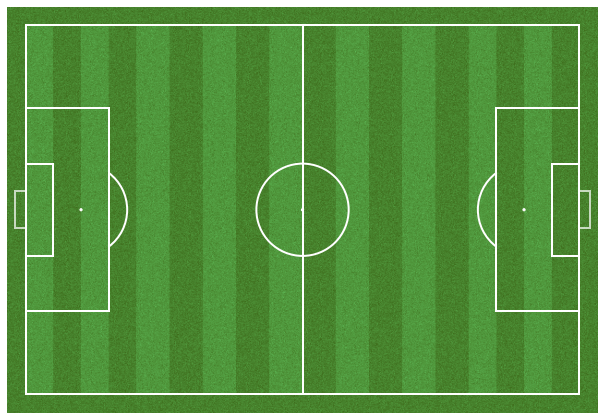

In [38]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(12, 6), goal_type='box')

fig, ax = pitch.draw()

## Position Strength Color Map

In [52]:
import plotly.graph_objects as go

color = list(color_map.values())

fig = go.Figure(go.Barpolar(r = np.array([100, 80, 70, 60, 50, 0]),
                            theta = np.array([0, 360, 360, 360, 360]),
                            marker_color = color))
                
fig.update_polars(gridshape='linear')
    
fig.update_layout(polar_bargap=0)

<center><b>References</b></center>

<br>

<center><b>Data: FIFA15-FIFA21 Players Dataset</b></center>


https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

<br>

<center><b>Other Resources</b></center>


1) https://www.kaggle.com/gurarako/plotly-radar-chart-pokemon-part-3

2) https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation

3) https://medium.com/@De1iveryGuy/a-lightweight-content-based-recommendation-system-for-football-players-based-on-statistical-data-1ad9e3f52303

4) https://medium.com/datadriveninvestor/how-to-built-a-recommender-system-rs-616c988d64b2